In [1]:
import pandas as pd

In [2]:
# reading data to data frame advertising 
advertising = pd.read_csv("tvmarketing.csv")

In [3]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
# get information about the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
# Check the shape of the data frame (Rows,columns)
advertising.shape

(200, 2)

In [7]:
# check the basic info of the data
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


Visualizing the data using seaborn

In [8]:
import seaborn as sns
%matplotlib inline

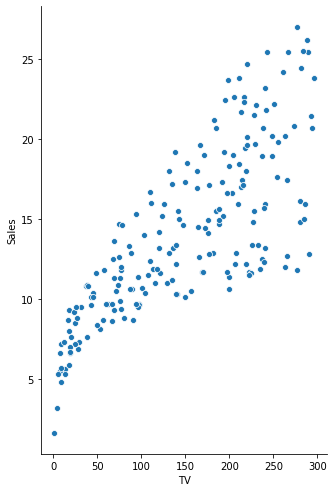

In [9]:
sns.pairplot(advertising,x_vars=["TV"],y_vars=["Sales"],height=7,aspect=0.7,kind='scatter')

In [10]:
# preparing x and y
# putting feature variable to x
x = advertising["TV"]
# print first 5 rows
x.head()


0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [11]:
# putting response variable to y
y= advertising["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
# press tab+shift to see the documentation
train_test_split 

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [14]:
print(type(x_train.shape))
print(type(x_test.shape))
print(type(y_train.shape))
print(type(y_test.shape))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [15]:
# This is a general convention that in sklearn that observations are rows while features are columns
# This is needed only when you are using a single feature; in this case it is "TV"

import numpy as np

x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


<h1>Performing Linear Regression<h1>

In [16]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(creating linear regression object)
lr = LinearRegression()

# Fit the model using lr.fit()

lr.fit(x_train,y_train)

lr.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [17]:
# coeffiecients calculation 
# y= Mx+C
print(lr.intercept_)  # M value
print(lr.coef_) # C value


6.989665857411679
[0.04649736]


y = 6.989x+0.04649 
 Let us use this to pridict the sales

In [18]:
# Making predictions on the testing set

y_pred = lr.predict(x_test)
type(y_pred)

numpy.ndarray

computing RMSE and R^2  value

Text(0, 0.5, 'sales')

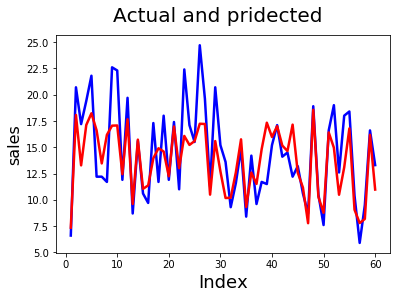

In [19]:
# Actual vs predicted

import matplotlib.pyplot as plt

c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test,color = "blue",linewidth = 2.5,linestyle="-")
plt.plot(c,y_pred,color = "red",linewidth = 2.5,linestyle="-")
fig.suptitle('Actual and pridected', fontsize=20) # plot heading
plt.xlabel('Index',fontsize=18) # plot x label
plt.ylabel('sales',fontsize=16) # plot y label


Text(0, 0.5, 'y_test-y_pred')

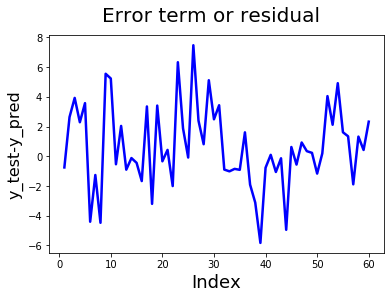

In [20]:
# Error term or residual
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred,color = "blue",linewidth = 2.5,linestyle="-")
fig.suptitle('Error term or residual', fontsize=20) # plot heading
plt.xlabel('Index',fontsize=18) # plot x label
plt.ylabel('y_test-y_pred',fontsize=16) # plot y label


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print('Mean squared error: ',mse)
print('r_squared : ',r_squared)



Mean squared error:  7.97579853285485
r_squared :  0.5942987267783302


In [22]:
# Model is not able to map only 7.97 % only
# if R^2 value is 60 or 70% then it is a good model.

Text(0, 0.5, 'Y Prediction')

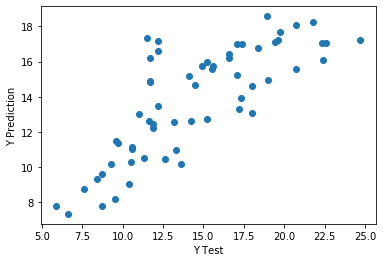

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')